In [ ]:
!nvidia-smi

Sat Nov 18 22:55:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install -Uqqq pip --progress-bar off
!pip install -qqq torch==2.0.1 --progress-bar off
!pip install -qqq transformers==4.31.0 --progress-bar off
!pip install -qqq langchain==0.0.266 --progress-bar off
!pip install -qqq chromadb==0.4.5 --progress-bar off
!pip install -qqq pypdf==3.15.0 --progress-bar off
!pip install -qqq xformers==0.0.20 --progress-bar off
!pip install -qqq sentence_transformers==2.2.2 --progress-bar off
!pip install -qqq InstructorEmbedding==1.0.1 --progress-bar off
!pip install -qqq pdf2image==1.16.3 --progress-bar off

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu118 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.
torchvision 0.16.0+cu118 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.


In [ ]:
!wget -q https://github.com/PanQiWei/AutoGPTQ/releases/download/v0.4.1/auto_gptq-0.4.1+cu118-cp310-cp310-linux_x86_64.whl

In [ ]:
!pip install -qqq auto_gptq-0.4.1+cu118-cp310-cp310-linux_x86_64.whl --progress-bar off

In [ ]:
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.2 [186 kB]
Fetched 186 kB in 1s (355 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 120872 f

In [ ]:
import torch
from auto_gptq import AutoGPTQForCausalLM
from langchain import HuggingFacePipeline, PromptTemplate
from langchain.chains import RetrievalQA
from langchain.document_loaders import PyPDFDirectoryLoader
from langchain.embeddings import HuggingFaceInstructEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from pdf2image import convert_from_path
from transformers import AutoTokenizer, TextStreamer, pipeline

DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"

In [ ]:
!mkdir pdfs

In [ ]:
!gdown 120jN_-ndHxHe5-bhOEwVcMbIF2weuyFL -O pdfs/ADHDScreen.pdf
!gdown 1m_DL4S6F6OAhVOeaU39d3-tfIDmY4Oru -O pdfs/NICHQ-Vanderbilt-Assessment-Scales.pdf
!gdown 1rGitDHaV0xsGaWAbNUzhN7j2hK_mnuPS -O pdfs/recommendations_adhd.pdf



Downloading...
From: https://drive.google.com/uc?id=120jN_-ndHxHe5-bhOEwVcMbIF2weuyFL
To: /content/pdfs/ADHDScreen.pdf
100% 317k/317k [00:00<00:00, 4.01MB/s]
Downloading...
From: https://drive.google.com/uc?id=1m_DL4S6F6OAhVOeaU39d3-tfIDmY4Oru
To: /content/pdfs/NICHQ-Vanderbilt-Assessment-Scales.pdf
100% 2.08M/2.08M [00:00<00:00, 14.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rGitDHaV0xsGaWAbNUzhN7j2hK_mnuPS
To: /content/pdfs/recommendations_adhd.pdf
100% 156k/156k [00:00<00:00, 3.16MB/s]


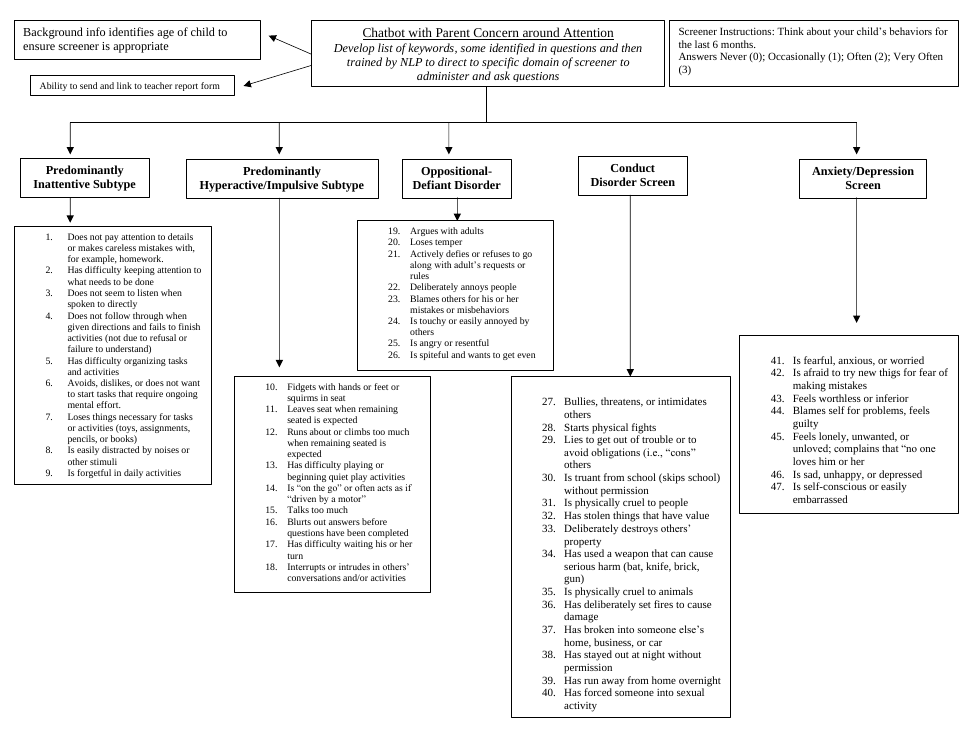

In [ ]:
meta_images = convert_from_path("pdfs/ADHDScreen.pdf", dpi=88)
meta_images[0]

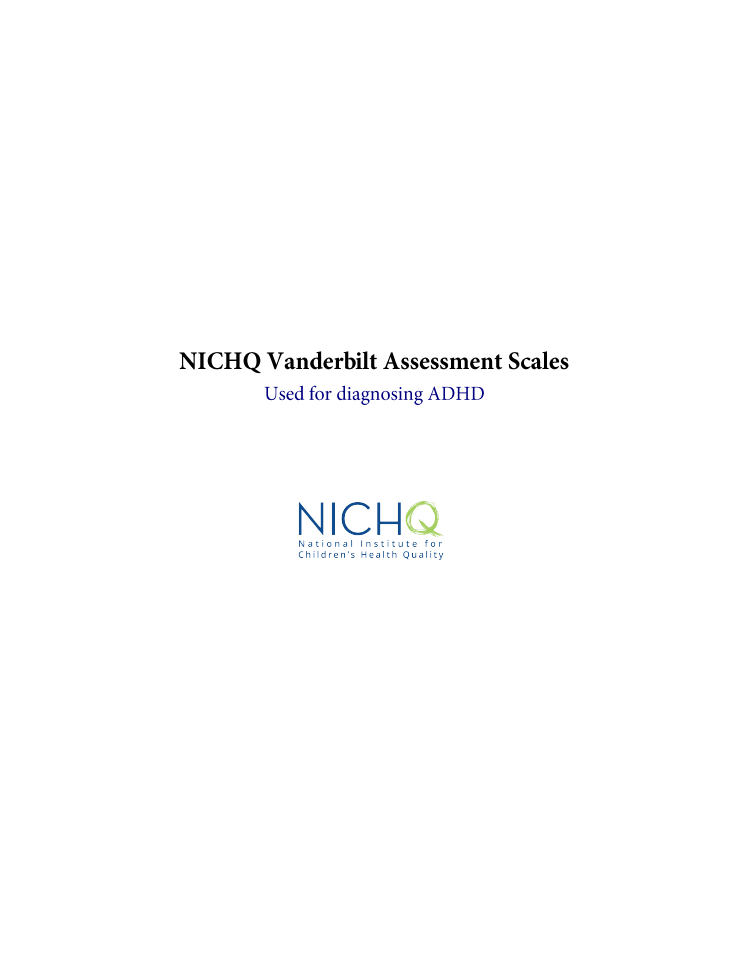

In [ ]:
meta_images = convert_from_path("pdfs/NICHQ-Vanderbilt-Assessment-Scales.pdf", dpi=88)
meta_images[0]

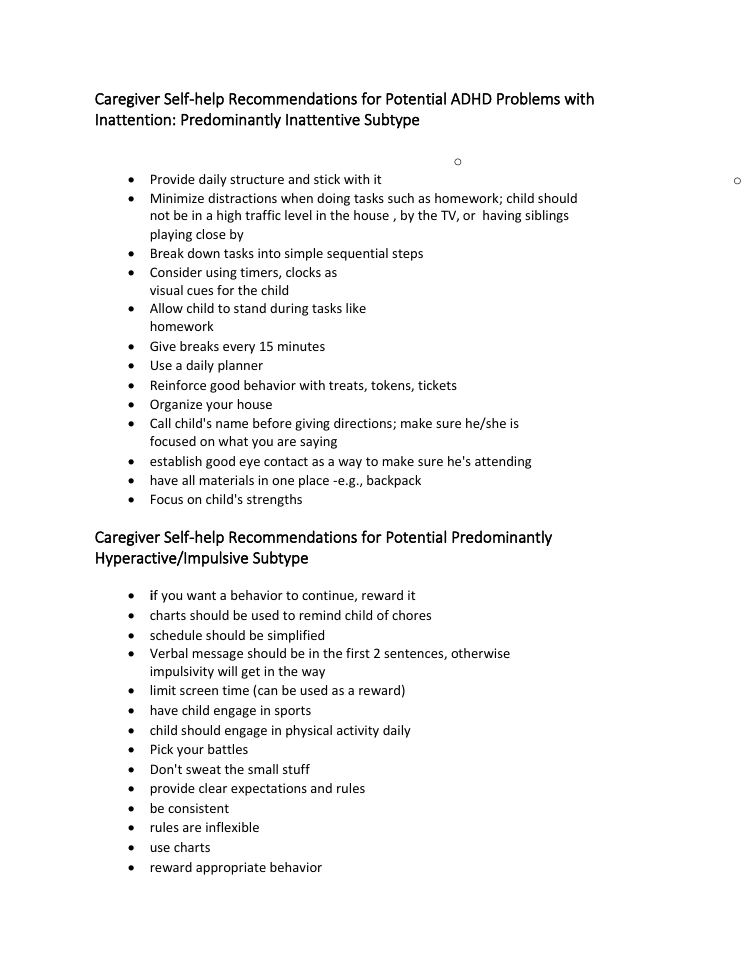

In [ ]:
meta_images = convert_from_path("pdfs/recommendations_adhd.pdf", dpi=88)
meta_images[0]

In [ ]:
!rm -rf "db"

In [ ]:
loader = PyPDFDirectoryLoader("pdfs")
docs = loader.load()
len(docs)

14

In [ ]:
embeddings = HuggingFaceInstructEmbeddings(
    model_name="hkunlp/instructor-large", model_kwargs={"device": DEVICE}
)

(…)06e59443b07dc819fb15c7233/.gitattributes:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

(…)3b07dc819fb15c7233/1_Pooling/config.json:   0%|          | 0.00/270 [00:00<?, ?B/s]

(…)443b07dc819fb15c7233/2_Dense/config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.15M [00:00<?, ?B/s]

(…)84de506e59443b07dc819fb15c7233/README.md:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

(…)de506e59443b07dc819fb15c7233/config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

(…)5c7233/config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

(…)dc819fb15c7233/sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

(…)07dc819fb15c7233/special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

(…)06e59443b07dc819fb15c7233/tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

(…)3b07dc819fb15c7233/tokenizer_config.json:   0%|          | 0.00/2.41k [00:00<?, ?B/s]

(…)e506e59443b07dc819fb15c7233/modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

load INSTRUCTOR_Transformer
max_seq_length  512


In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=64)
texts = text_splitter.split_documents(docs)
len(texts)

37

In [ ]:
%%time
db = Chroma.from_documents(texts, embeddings, persist_directory="db")

CPU times: user 4.1 s, sys: 248 ms, total: 4.35 s
Wall time: 9.06 s


In [ ]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GPTQ"
model_basename = "model"

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)

model = AutoGPTQForCausalLM.from_quantized(
    model_name_or_path,
    revision="gptq-4bit-128g-actorder_True",
    model_basename=model_basename,
    use_safetensors=True,
    trust_remote_code=True,
    inject_fused_attention=False,
    device=DEVICE,
    quantize_config=None,
)

(…)-GPTQ/resolve/main/tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

(…)3B-chat-GPTQ/resolve/main/tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

(…)PTQ/resolve/main/special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

(…)2-13B-chat-GPTQ/resolve/main/config.json:   0%|          | 0.00/837 [00:00<?, ?B/s]

(…)gptq-4bit-128g-actorder_True/config.json:   0%|          | 0.00/761 [00:00<?, ?B/s]

(…)-128g-actorder_True/quantize_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/7.26G [00:00<?, ?B/s]

In [ ]:
!nvidia-smi

Mon Nov 13 21:58:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    37W /  70W |   9547MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
DEFAULT_SYSTEM_PROMPT = """
You are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe. Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature.

If a question does not make any sense, or is not factually coherent, explain why instead of answering something not correct. If you don't know the answer to a question, please don't share false information.
""".strip()


def generate_prompt(prompt: str, system_prompt: str = DEFAULT_SYSTEM_PROMPT) -> str:
    return f"""
[INST] <<SYS>>
{system_prompt}
<</SYS>>

{prompt} [/INST]
""".strip()

In [ ]:
streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)

In [ ]:
text_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=1024,
    temperature=0,
    top_p=0.85,
    repetition_penalty=1.15,
    streamer=streamer,
)

    PyTorch 2.0.1+cu118 with CUDA 1108 (you have 2.1.0+cu121)
    Python  3.10.11 (you have 3.10.12)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
The model 'LlamaGPTQForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'Marian

In [ ]:
llm = HuggingFacePipeline(pipeline=text_pipeline, model_kwargs={"temperature": 0})

In [ ]:
SYSTEM_PROMPT = "Give recommendations to the provider based on the context. These recommendations should be from the given information. Do not add your own information and recommendations. Always stick to the context. If you don't know the answer, inform the user and do not add additional information."

template = generate_prompt(
    """
{context}

Question: {question}
""",
    system_prompt=SYSTEM_PROMPT,
)

In [ ]:
prompt = PromptTemplate(template=template, input_variables=["context", "question"])

In [ ]:
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={"k": 2}),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt},
)

In [ ]:
result = qa_chain("Priya has difficulty with focusing on one thing at a time. She blurts out answers before questions have been completed. Provide detailed recommendations.")

 Based on the information provided, here are some detailed recommendations for Priya's difficulties with focusing on one thing at a time and blurting out answers before questions have been completed:

1. Break tasks into smaller chunks: Divide larger tasks into smaller, more manageable parts to help Priya focus on one thing at a time. For example, instead of asking her to complete an entire worksheet, break it down into smaller sections or tasks.
2. Use visual timers: Visual timers can help Priya stay focused and aware of time limits. Set a timer for a specific amount of time (e.g., 5 minutes) and encourage Priya to work on a task without any distractions during that time. When the timer goes off, take a short break before starting the next task.
3. Practice mindfulness: Mindfulness techniques can help Priya become more aware of her thoughts and feelings, which may reduce the urge to blurt out answers before questions have been completed. Encourage her to take deep breaths, pay attenti

In [ ]:
result = qa_chain("What is blackhole")

 Based on the provided information, I cannot provide a definition for "black hole" as it is not within the context of the given information. The terms provided are related to emotions, feelings, and behaviors, but there is no mention of a physical phenomenon such as a black hole. Therefore, I suggest seeking information on these topics from a different source.


In [ ]:
result = qa_chain("")